# FINTECH BOOTCAMP 

PROJECT 1: BABY STEP - BACKTESTING
---
###.[project info]

## Team member:
__


## Project description





In [1]:
# Initial import all libraries
import panel as pn
pn.extension('plotly')
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf


## I. DATA READING AND CLEANING

In [2]:
#Define the instruments to download data of S&P .
tickers = ['SPY']

# Fetch SPY Data from 1/1/1992 until 12/31/2021.
start_date = datetime.date(1997,1,1)
end_date = datetime.date(2021,12,31)
years = round((end_date - start_date).days/365,0)
years

25.0

In [3]:
# User pandas_reader.data.DataReader to load the desired data. 
panel_data = data.DataReader("SPY", 'yahoo', start_date, end_date)

# Checkout the data type
type(panel_data)

pandas.core.frame.DataFrame

In [4]:
# Check data
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-01-02,74.375000,72.750000,74.375000,74.031250,2031900.0,47.419117
1997-01-03,75.125000,74.078125,74.375000,75.093750,2123200.0,48.099667
1997-01-06,75.437500,74.312500,75.093750,74.437500,1374100.0,47.679333
1997-01-07,75.468750,74.125000,74.437500,75.343750,939000.0,48.259808
1997-01-08,75.781250,74.687500,75.750000,74.687500,1802200.0,47.839470
...,...,...,...,...,...,...
2021-12-27,477.309998,472.010010,472.059998,477.260010,56808600.0,477.260010
2021-12-28,478.809998,476.059998,477.720001,476.869995,47274600.0,476.869995
2021-12-29,478.559998,475.920013,476.980011,477.480011,54503000.0,477.480011


In [5]:
# Filter closing price only
price = panel_data.drop(columns = ["High", "Low", "Open", "Volume", "Adj Close"])
price.head()

,Close
Date,
1997-01-02,74.03125
1997-01-03,75.09375
1997-01-06,74.43750
1997-01-07,75.34375
1997-01-08,74.68750


In [6]:
# Describe data
price.describe()

,Close
count,6293.000000
mean,169.189590
std,83.419133
min,68.110001
25%,113.660004
50%,135.360001
75%,207.259995
max,477.480011


In [7]:
# Count nulls and drop nulls (in any)
price.isnull().sum()

Close    0
dtype: int64

In [8]:
# Check  if closing price is float 
price.dtypes

Close    float64
dtype: object

## II. CALCULATE SPY RETURN, CAGR, AND SHARPE RATIO  

In [9]:
inital_investment = 10000 

In [10]:
# Find out min and max value
min_spy = price["Close"].min()

In [11]:
max_spy = price["Close"].max()

In [12]:
def chart_spy ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(price["Close"])
    ax.set(xlabel = "Year",
    ylabel = "Price")
    #plt.yticks(np.linspace(min_spy.min(), max_spy.max(),10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return chart_spy
#     return pn.pane.Matplotlib(tight= True)[in case of nto shown in dashboard]

<function __main__.chart_spy()>

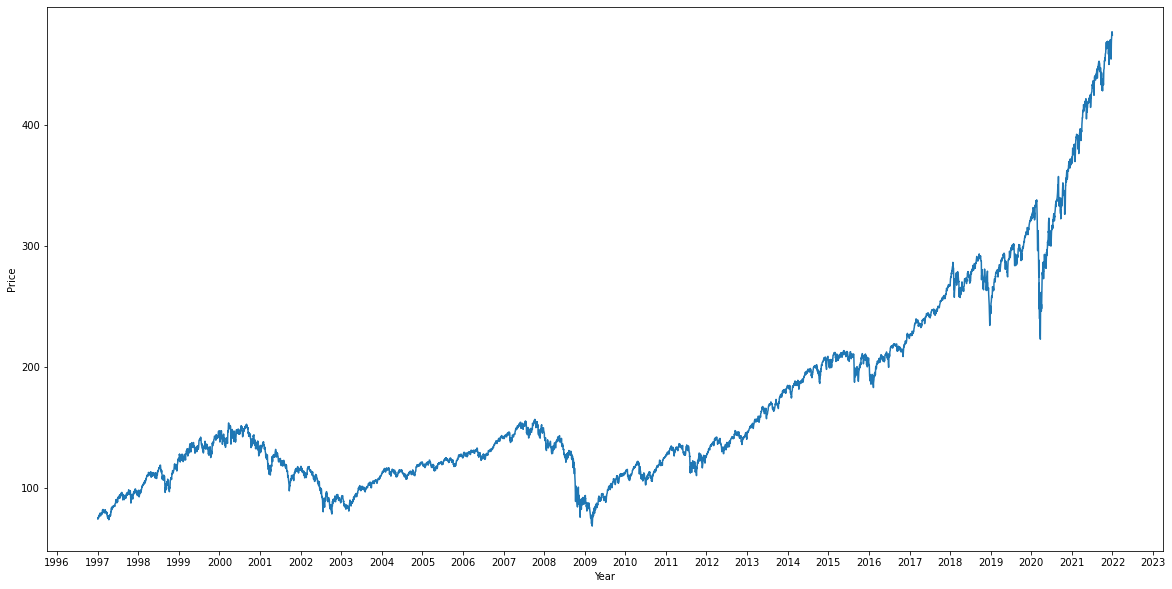

In [13]:
chart_spy()

In [14]:
# Calculate returns for SPY as a benchmark and compound annual growth rate (CAGR)
spy_daily_return = price [["Close"]]
spy_daily_return = spy_daily_return.pct_change()
spy_daily_return.rename(columns= {"Close" : "BM Daily Return"}, inplace = True)

In [15]:
# Cumulative return
spy_daily_return["BM Cumulative Return"] = (1 + spy_daily_return["BM Daily Return"]).cumprod() - 1
spy_daily_return

,BM Daily Return,BM Cumulative Return
Date,,
1997-01-02,NaN,NaN
1997-01-03,0.014352,0.014352
1997-01-06,-0.008739,0.005488
1997-01-07,0.012175,0.017729
1997-01-08,-0.008710,0.008864
...,...,...
2021-12-27,0.014152,5.446737
2021-12-28,-0.000817,5.441469
2021-12-29,0.001279,5.449709


In [16]:
# Total return and CAGR
total_return_pct = round(spy_daily_return["BM Cumulative Return"][-1]*100, 2)
cagr_pct = round((((1+ spy_daily_return["BM Cumulative Return"][-1])**(1/years))-1)*100,2)

In [17]:
print(total_return_pct)
print(cagr_pct)

541.57
7.72


In [18]:
# Calculate standard deviation and sharpe ratio for SPY as a benchmark
annualized_std_spy = round(spy_daily_return["BM Daily Return"].std()*np.sqrt(252),2)
annualized_std_spy

0.2

In [19]:
sharpe_ratio_spy = round(spy_daily_return["BM Daily Return"].mean()/annualized_std_spy)
sharpe_ratio_spy

0

In [20]:
# Calculate benchmark drawdown

In [21]:
spy_daily_return["Peak Cummulative"] = spy_daily_return["BM Cumulative Return"].cummax()
spy_daily_return["Daily Drawdown"] = spy_daily_return["BM Cumulative Return"] - spy_daily_return["Peak Cummulative"]

In [22]:
bm_drawdown_pct = round((spy_daily_return["Daily Drawdown"]/spy_daily_return["Peak Cummulative"]*100).min(),2)
bm_drawdown_pct

-108.37

In [23]:
# Summary for benchmark SPY
df_summary = pd.DataFrame()
index =  ["Benchmark", "Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4", "Strategy 5"]
columns =  ["Total Return", "CAGR", "Annualized Standard Deviation", "Sharpe Ratio", "Drawdown"]
df_summary = pd.DataFrame(columns = columns, index=index)
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,NaN,NaN,NaN,NaN,NaN
Strategy 1,NaN,NaN,NaN,NaN,NaN
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


In [24]:
df_summary.loc["Benchmark"] = pd.Series({ "Total Return" : total_return_pct, "CAGR" : cagr_pct, "Annualized Standard Deviation" : annualized_std_spy, "Sharpe Ratio" : sharpe_ratio_spy, "Drawdown" :bm_drawdown_pct})
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,541.57,7.72,0.2,0.0,-108.37
Strategy 1,NaN,NaN,NaN,NaN,NaN
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


## III. SIMPLE MOVING AVERAGE CROSSOVER BACKTESTING

### 1. Strategy 1 - Backtesting 50 SMA crossing 200 SMA [Hanna here]

In [25]:
# Define variables
fast_ma_1 = 50
slow_ma_1 = 200

In [26]:
# Calculate moving average for Strategy 1

In [27]:
strategy1 = price[["Close"]]

In [28]:
strategy1["Fast SMA"] = strategy1["Close"].rolling(window = fast_ma_1).mean()
strategy1["Slow SMA"] = strategy1["Close"].rolling(window = slow_ma_1).mean()
strategy1

,Close,Fast SMA,Slow SMA
Date,,,
1997-01-02,74.031250,NaN,NaN
1997-01-03,75.093750,NaN,NaN
1997-01-06,74.437500,NaN,NaN
1997-01-07,75.343750,NaN,NaN
1997-01-08,74.687500,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,435.577850
2021-12-28,476.869995,463.063001,435.980150
2021-12-29,477.480011,463.668801,436.388000


<function __main__.strategy1_plot()>

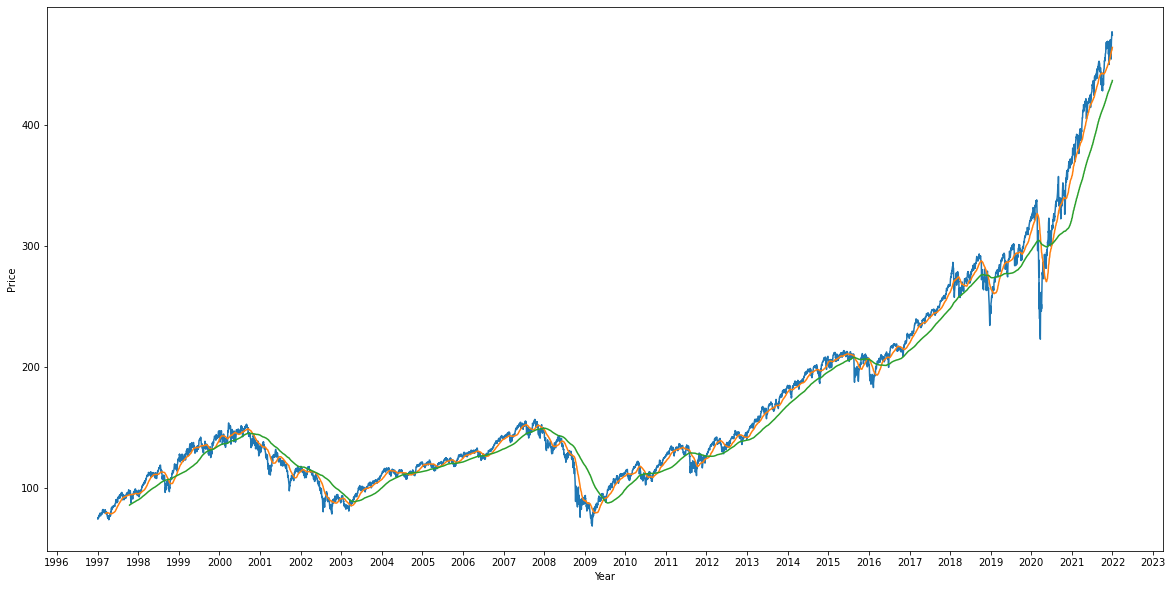

In [29]:
# Plot a graph
def strategy1_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy1)
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy1_plot
strategy1_plot()

In [30]:
# Define entries for long position
strategy1

,Close,Fast SMA,Slow SMA
Date,,,
1997-01-02,74.031250,NaN,NaN
1997-01-03,75.093750,NaN,NaN
1997-01-06,74.437500,NaN,NaN
1997-01-07,75.343750,NaN,NaN
1997-01-08,74.687500,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,435.577850
2021-12-28,476.869995,463.063001,435.980150
2021-12-29,477.480011,463.668801,436.388000


In [31]:
#benchmark_spy = spy_daily_return.loc[:,"BM Daily Return": "BM Cumulative Return"]
#benchmark_spy

In [32]:
# Formulate the strategy

In [33]:
benchmark_spy = spy_daily_return[["BM Daily Return"]]
strategy1_return = pd.concat([strategy1,benchmark_spy],axis=1, join = "inner")
strategy1_return["Long Position"] = strategy1['Fast SMA'] > strategy1["Slow SMA"]
strategy1_return.head()

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position
Date,,,,,
1997-01-02,74.03125,NaN,NaN,NaN,False
1997-01-03,75.09375,NaN,NaN,0.014352,False
1997-01-06,74.43750,NaN,NaN,-0.008739,False
1997-01-07,75.34375,NaN,NaN,0.012175,False
1997-01-08,74.68750,NaN,NaN,-0.008710,False


In [34]:
strategy1_return = pd.concat([strategy1,benchmark_spy],axis=1, join = "inner")
strategy1_return["Long Position"] = strategy1['Fast SMA'] > strategy1["Slow SMA"]
strategy1_return.head()

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position
Date,,,,,
1997-01-02,74.03125,NaN,NaN,NaN,False
1997-01-03,75.09375,NaN,NaN,0.014352,False
1997-01-06,74.43750,NaN,NaN,-0.008739,False
1997-01-07,75.34375,NaN,NaN,0.012175,False
1997-01-08,74.68750,NaN,NaN,-0.008710,False


In [35]:
strategy1_return["Strategy1 Return"] = np.where(strategy1_return["Long Position"].shift(1) == True, strategy1_return["BM Daily Return"], 0)
strategy1_return.tail()

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return
Date,,,,,,
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279
2021-12-30,476.160004,464.179201,436.782500,-0.002765,True,-0.002765
2021-12-31,474.959991,464.630201,437.199899,-0.002520,True,-0.002520


In [36]:
strategy1_return["Strategy1 Cumulative Return"] = (1+ strategy1_return["Strategy1 Return"]).cumprod()-1
strategy1_return

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return,Strategy1 Cumulative Return
Date,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,0.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,0.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,0.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,0.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,0.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,4.129356
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,4.125164
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,4.131720


In [37]:
# Plot with the benchmark
def strategy1_return_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(spy_daily_return["BM Cumulative Return"])
    ax.plot(strategy1_return["Strategy1 Cumulative Return"])
    ax.set(xlabel = "Year",
    ylabel = "Profit")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy1_return_plot

<function __main__.strategy1_return_plot()>

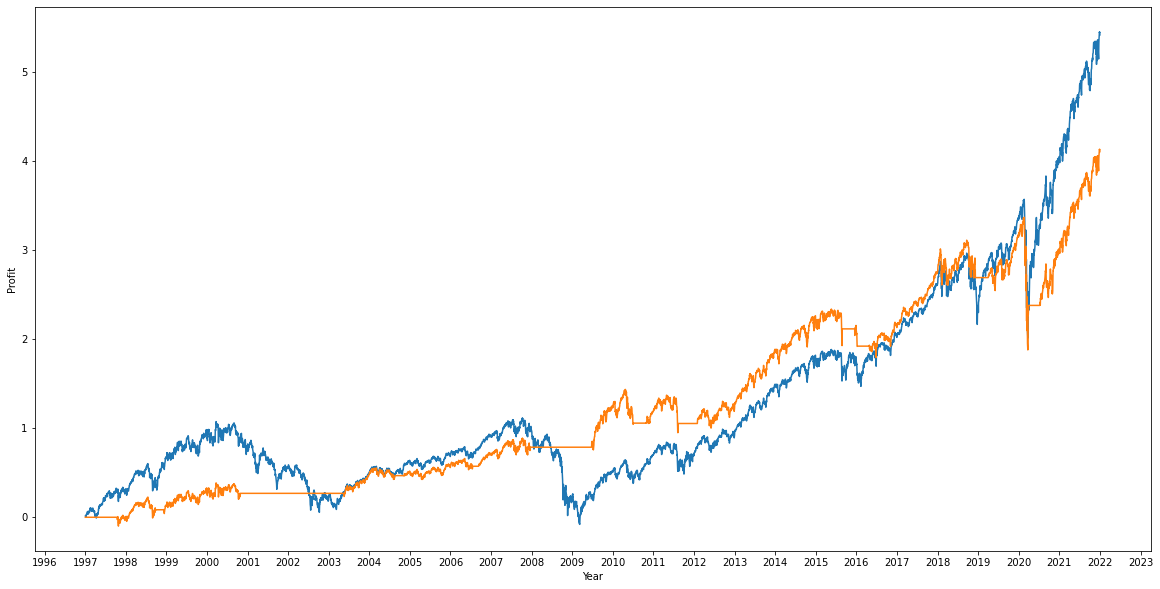

In [38]:
strategy1_return_plot()

In [39]:
# Calculate strategy total return and CAGR

strategy1_total_return_pct = round(strategy1_return["Strategy1 Cumulative Return"][-1] * 100, 2)
strategy1_cagr_pct = round((((1 + strategy1_return["Strategy1 Cumulative Return"][-1])**(1/years))-1)*100,2)

In [40]:
print(strategy1_total_return_pct)

410.46


In [41]:
print(strategy1_cagr_pct)

6.74


In [42]:
exposure_days = (len(strategy1_return["Strategy1 Return"]) - (strategy1_return["Strategy1 Return"]==0).sum())/len(strategy1_return["Strategy1 Return"])
exposure_days

0.7028444303194025

In [43]:
strategy1_return_filter = strategy1_return[strategy1_return["Strategy1 Cumulative Return"]!=0]
strategy1_return_filter

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return,Strategy1 Cumulative Return
Date,,,,,,,
1997-10-16,95.250000,94.019063,85.601406,-0.015822,True,-0.015822,-0.015822
1997-10-17,94.281250,93.998437,85.697344,-0.010171,True,-0.010171,-0.025831
1997-10-20,95.625000,94.043437,85.803281,0.014253,True,0.014253,-0.011947
1997-10-21,97.484375,94.111875,85.913984,0.019444,True,0.019444,0.007265
1997-10-22,96.843750,94.197500,86.024766,-0.006572,True,-0.006572,0.000646
...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,4.129356
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,4.125164
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,4.131720


In [44]:
# Calculate standard deviation and sharpe ratio
strategy1_annualized_std = round(strategy1_return_filter["Strategy1 Return"].std()*np.sqrt(252),2)
strategy1_annualized_std

0.14

In [45]:
strategy1_sharpe_ratio = round((strategy1_return_filter["Strategy1 Return"].mean() * 252)/strategy1_annualized_std,2)
strategy1_sharpe_ratio

0.55

In [46]:
# Calculate Drawdown strategy 1
strategy1_return["Strategy1 Peak Cumulative"]= strategy1_return["Strategy1 Cumulative Return"].cummax()
strategy1_return

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return,Strategy1 Cumulative Return,Strategy1 Peak Cumulative
Date,,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,0.000000,0.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,0.000000,0.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,0.000000,0.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,0.000000,0.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,4.129356,4.129356
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,4.125164,4.129356
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,4.131720,4.131720


In [47]:
strategy1_return["Strategy1 Daily Drawdown"] = strategy1_return["Strategy1 Cumulative Return"] - strategy1_return["Strategy1 Peak Cumulative"]

In [48]:
#strategy1_return = strategy1_return[["Strategy1 Peak Cumulative"]!=0]
#strategy1_return

strategy1_return = strategy1_return[strategy1_return["Strategy1 Peak Cumulative"]!=0]
strategy1_return

,Close,Fast SMA,Slow SMA,BM Daily Return,Long Position,Strategy1 Return,Strategy1 Cumulative Return,Strategy1 Peak Cumulative,Strategy1 Daily Drawdown
Date,,,,,,,,,
1997-10-21,97.484375,94.111875,85.913984,0.019444,True,0.019444,0.007265,0.007265,0.000000
1997-10-22,96.843750,94.197500,86.024766,-0.006572,True,-0.006572,0.000646,0.007265,-0.006619
1997-10-23,94.937500,94.250625,86.122891,-0.019684,True,-0.019684,-0.019051,0.007265,-0.026316
1997-10-24,94.000000,94.278125,86.212266,-0.009875,True,-0.009875,-0.028737,0.007265,-0.036003
1997-10-27,87.187500,94.226250,86.268125,-0.072473,True,-0.072473,-0.099128,0.007265,-0.106393
...,...,...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,4.129356,4.129356,0.000000
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,4.125164,4.129356,-0.004192
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,4.131720,4.131720,0.000000


In [49]:
strategy1_drawdown_pct = np.where(strategy1_return["Strategy1 Peak Cumulative"] != 0,round(((strategy1_return["Strategy1 Daily Drawdown"]/ strategy1_return["Strategy1 Peak Cumulative"]).min())*100,2),np.nan)
strategy1_drawdown_pct

array([-1464.44, -1464.44, -1464.44, ..., -1464.44, -1464.44, -1464.44])

In [50]:
# Summary of the strategy1 

In [51]:
df_summary.loc["Strategy 1"] = pd.Series({ "Total Return" : strategy1_total_return_pct, "CAGR" : strategy1_cagr_pct, "Annualized Standard Deviation" : strategy1_annualized_std, "Sharpe Ratio" : strategy1_sharpe_ratio, "Drawdown" :strategy1_drawdown_pct})
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,541.57,7.72,0.2,0.0,-108.37
Strategy 1,410.46,6.74,0.14,0.55,"[-1464.44, -1464.44, -1464.44, -1464.44, -1464..."
Strategy 2,NaN,NaN,NaN,NaN,NaN
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


### 2. Backtesting 50 SMA crossing 100 SMA [Claudia here]

In [52]:
# Define variables
fast_ma_2 = 50
slow_ma_2 = 100

In [53]:
# Calculate moving average for strategy 2

In [54]:
strategy2 = price[["Close"]]

In [55]:
strategy2['Fast_MA'] = strategy2['Close'].rolling(window = fast_ma_2).mean()
strategy2['Slow_MA'] = strategy2['Close'].rolling(window = slow_ma_2).mean()

# Observe the values
strategy2


,Close,Fast_MA,Slow_MA
Date,,,
1997-01-02,74.031250,NaN,NaN
1997-01-03,75.093750,NaN,NaN
1997-01-06,74.437500,NaN,NaN
1997-01-07,75.343750,NaN,NaN
1997-01-08,74.687500,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,452.518901
2021-12-28,476.869995,463.063001,452.870001
2021-12-29,477.480011,463.668801,453.219901


<function __main__.strategy1_plot()>

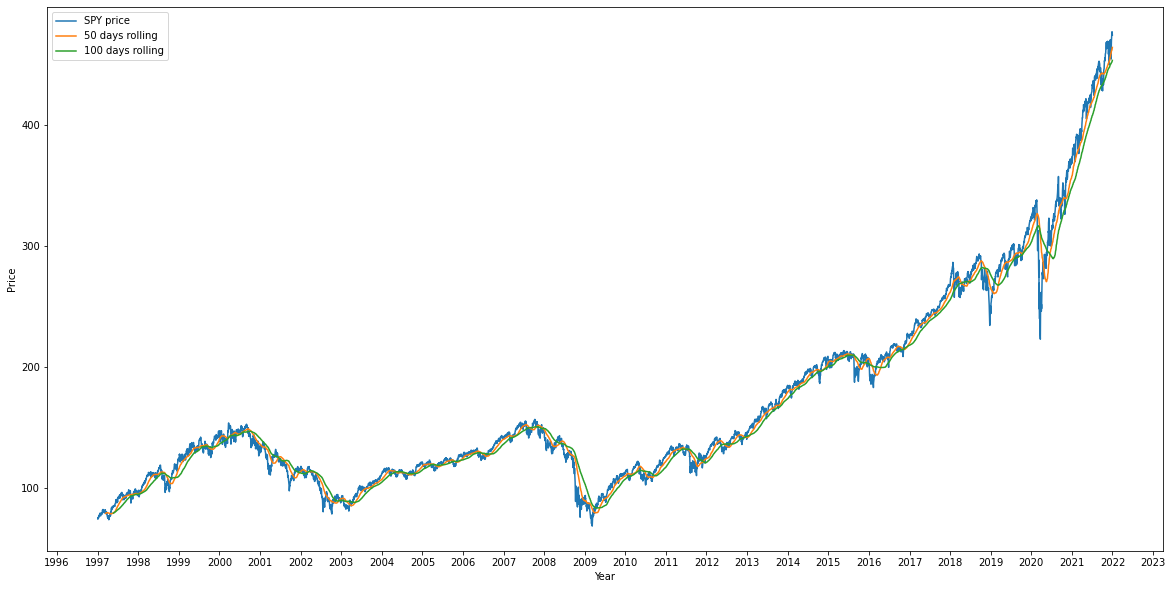

In [56]:
# Plot a graph

# Create a function that can be used to plot any of the graphs based on the strategy 
def strategy_plot (strategy, price_label, short_label, long_label):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy.Close.index, strategy.Close, label=price_label)
    ax.plot(strategy.Fast_MA.index, strategy.Fast_MA, label=short_label)
    ax.plot(strategy.Slow_MA.index, strategy.Slow_MA, label=long_label)
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.legend()
    return strategy1_plot
strategy_plot(strategy2, 'SPY price', '50 days rolling', '100 days rolling')

In [57]:
# Define entries for long position
strategy2

,Close,Fast_MA,Slow_MA
Date,,,
1997-01-02,74.031250,NaN,NaN
1997-01-03,75.093750,NaN,NaN
1997-01-06,74.437500,NaN,NaN
1997-01-07,75.343750,NaN,NaN
1997-01-08,74.687500,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,452.518901
2021-12-28,476.869995,463.063001,452.870001
2021-12-29,477.480011,463.668801,453.219901


In [58]:
strategy2_return = pd.concat([strategy2, benchmark_spy],axis=1, join = "inner")
strategy2_return["Long_Position"] = strategy2.Fast_MA > strategy2.Slow_MA
strategy2_return 

,Close,Fast_MA,Slow_MA,BM Daily Return,Long_Position
Date,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False
1997-01-03,75.093750,NaN,NaN,0.014352,False
1997-01-06,74.437500,NaN,NaN,-0.008739,False
1997-01-07,75.343750,NaN,NaN,0.012175,False
1997-01-08,74.687500,NaN,NaN,-0.008710,False
...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True
2021-12-29,477.480011,463.668801,453.219901,0.001279,True


In [59]:
# Define exit for short position

#strategy2_return["Short_Position"] = strategy2.Slow_MA > strategy2.Fast_MA

#strategy2_return

In [60]:
# Calculate daily returns
#strategy2_return["Returns"] = strategy2["Close"].pct_change()
#strategy2_return

In [61]:
# Calculate the strategy balance
# First calculate the strategy returns
strategy2_return["strategy2_Return"] = np.where(strategy2_return["Long_Position"].shift(1) == True, strategy2_return["BM Daily Return"], 0) 
strategy2_return

,Close,Fast_MA,Slow_MA,BM Daily Return,Long_Position,strategy2_Return
Date,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000
...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True,0.014152
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True,-0.000817
2021-12-29,477.480011,463.668801,453.219901,0.001279,True,0.001279


In [62]:
# Then calculate the strategy balance using the cumulative returns
strategy2_return["Strategy2_Cumulative_Return"] = (1+ strategy2_return["strategy2_Return"]).cumprod()
strategy2_return

,Close,Fast_MA,Slow_MA,BM Daily Return,Long_Position,strategy2_Return,Strategy2_Cumulative_Return
Date,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,1.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,1.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,1.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,1.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,1.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True,0.014152,3.321647
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True,-0.000817,3.318933
2021-12-29,477.480011,463.668801,453.219901,0.001279,True,0.001279,3.323178


<function __main__.strategy_return_plot(spy_daily_return, strategy_return, strategy_label)>

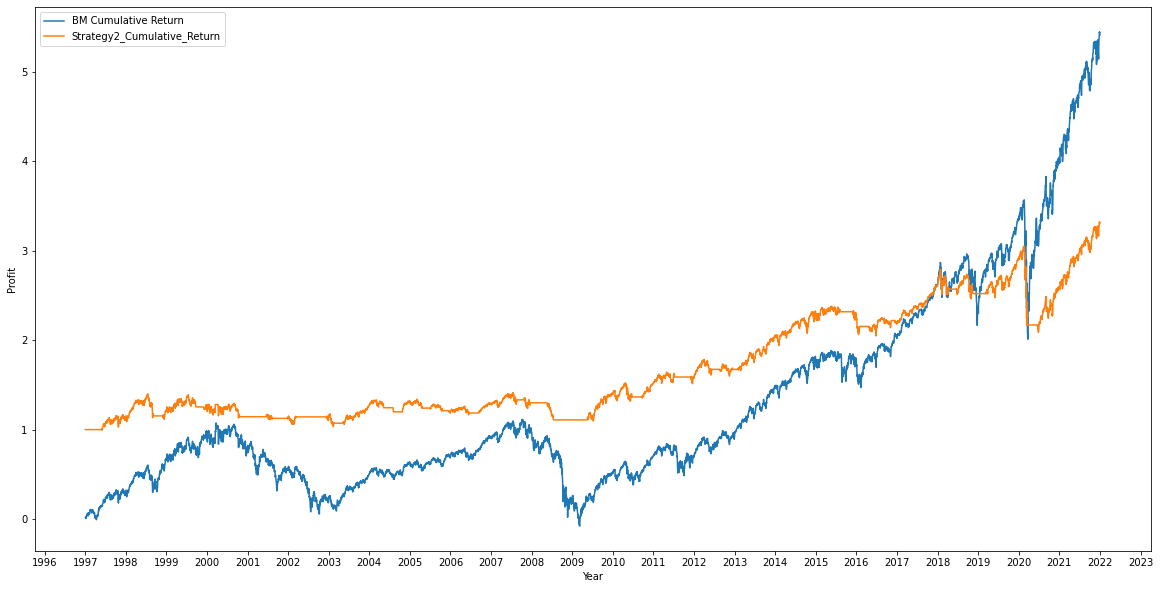

In [63]:
# Plot with the benchmark

# Create a function that can be used to plot any of the graphs based on the strategy return
# Note: The 'strategy_label' parameter has to be the same as the column name as it's used to access the 'strategy_return' column
def strategy_return_plot (spy_daily_return, strategy_return, strategy_label):
    fig, ax = plt.subplots(figsize=(20, 10))
    #ax.plot(strategy)
    ax.plot(spy_daily_return["BM Cumulative Return"].index, spy_daily_return["BM Cumulative Return"], label="BM Cumulative Return")
    ax.plot(strategy_return[strategy_label].index, strategy_return[strategy_label], label=strategy_label)
    ax.set(xlabel = "Year",
    ylabel = "Profit")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.legend()
    return strategy_return_plot
strategy_return_plot(spy_daily_return, strategy2_return, "Strategy2_Cumulative_Return")

In [64]:
# Calculate strategy total return and CAGR

strategy2_total_return_pct = round((strategy2_return["Strategy2_Cumulative_Return"][-1]/strategy2_return["Strategy2_Cumulative_Return"][0] - 1) * 100, 2)
strategy2_cagr_pct = round((((strategy2_return["Strategy2_Cumulative_Return"][-1]/strategy2_return["Strategy2_Cumulative_Return"][0])**(1/years))-1)*100,2)

In [65]:
print(strategy2_total_return_pct)

230.56


In [66]:
print(strategy2_cagr_pct)

4.9


In [67]:
# Calculate standard deviation and sharpe ratio
strategy2_annualized_std = round(strategy2_return["strategy2_Return"].std()*np.sqrt(252),2)
strategy2_annualized_std

0.13

In [68]:
strategy2_sharpe_ratio = round((strategy2_return["strategy2_Return"].mean() * 252)/strategy2_annualized_std,2)
strategy2_sharpe_ratio

0.44

In [69]:
# Calculate benchmark drawdown

strategy2_return["Strategy2_Peak_Cumulative"] = strategy2_return["Strategy2_Cumulative_Return"].cummax()
strategy2_return["Strategy2_Daily_Drawdown"] = strategy2_return["Strategy2_Cumulative_Return"] - strategy2_return["Strategy2_Peak_Cumulative"]

In [70]:
strategy2_drawdown_pct = round(((strategy2_return["Strategy2_Daily_Drawdown"]/ strategy2_return["Strategy2_Peak_Cumulative"]).min())*100,2)
strategy2_drawdown_pct

-31.59

In [71]:
# Summary of the strategy

In [72]:
df_summary.loc["Strategy 2"] = pd.Series({ "Total Return" : strategy2_total_return_pct, "CAGR" : strategy2_cagr_pct, "Annualized Standard Deviation" : strategy2_annualized_std, "Sharpe Ratio" : strategy2_sharpe_ratio, "Drawdown" :strategy2_drawdown_pct})
df_summary

,Total Return,CAGR,Annualized Standard Deviation,Sharpe Ratio,Drawdown
Benchmark,541.57,7.72,0.2,0.0,-108.37
Strategy 1,410.46,6.74,0.14,0.55,"[-1464.44, -1464.44, -1464.44, -1464.44, -1464..."
Strategy 2,230.56,4.9,0.13,0.44,-31.59
Strategy 3,NaN,NaN,NaN,NaN,NaN
Strategy 4,NaN,NaN,NaN,NaN,NaN
Strategy 5,NaN,NaN,NaN,NaN,NaN


### 3. Backtesting 20 EMA crossing 50 SMA [Atousa here]

In [ ]:
# Define variables
fast_ma_3 = 20
slow_ma_3 = 50

In [ ]:
# Calculate moving average

In [ ]:
# Plot a graph

In [ ]:
# Define entries for long position

In [ ]:
# Define exit for short position

In [ ]:
# Calculate the strategy balance

In [ ]:
# Plot with the benchmark

In [ ]:
# Calculate strategy total return and CAGR

In [ ]:
# Calculate standard deviation and sharpe ratio

In [ ]:
# Calculate benchmark drawdown

In [ ]:
# Summary of the strategy

### 4. Backtesting 11 EMA crossing the 49 EMA [Jalal here]

In [ ]:
# Define variables
fast_ma_4 = 11
slow_ma_4 = 49

In [ ]:
# Calculate moving average

In [ ]:
# Plot a graph

In [ ]:
# Define entries for long position

In [ ]:
# Define exit for short position

In [ ]:
# Calculate the strategy balance

In [ ]:
# Plot with the benchmark

In [ ]:
# Calculate strategy total return and CAGR

In [ ]:
# Calculate standard deviation and sharpe ratio

In [ ]:
# Calculate benchmark drawdown

In [ ]:
# Summary of the strategy

### 5. Strategy 5: Backtesting 9 EMA crossing the 20 EMA 

In [ ]:
# Define variables
fast_ma_5 = 9
slow_ma_5 = 20

In [ ]:
# Calculate moving average for Strategy 5

In [ ]:
strategy5 = price[["Close"]]
strategy5

In [ ]:
strategy5["Fast EMA"] = strategy5["Close"].ewm(span=fast_ma_5, adjust=False,min_periods=fast_ma_5).mean()
strategy5["Slow EMA"] = strategy5["Close"].ewm(span=slow_ma_5, adjust=False,min_periods=slow_ma_5).mean()
strategy5

In [ ]:
# Plot a graph
def strategy5_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy5)
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy5_plot
strategy5_plot()

In [ ]:
# Define entries for long position

In [ ]:
strategy5_return = pd.concat([strategy5,benchmark_spy],axis=1, join = "inner")
strategy5_return["Long Position"] = strategy5['Fast EMA'] > strategy5["Slow EMA"]
strategy5_return.head()

In [ ]:
strategy5_return["Strategy5 Return"] = np.where(strategy5_return["Long Position"].shift(1) == True, strategy5_return["BM Daily Return"], 0)
strategy5_return.tail()

In [ ]:
strategy5_return["Strategy5 Cumulative Return"] = (1+ strategy5_return["Strategy5 Return"]).cumprod()
strategy5_return

In [ ]:
# Plot with the benchmark
def strategy5_return_plot ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(spy_daily_return["BM Cumulative Return"])
    ax.plot(strategy5_return["Strategy5 Cumulative Return"])
    ax.set(xlabel = "Year",
    ylabel = "Profit")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy5_return_plot

In [ ]:
strategy5_return_plot()

In [ ]:
# Calculate strategy total return and CAGR

strategy5_total_return_pct = round((strategy5_return["Strategy5 Cumulative Return"][-1]/strategy5_return["Strategy5 Cumulative Return"][0] - 1) * 100, 2)
strategy5_cagr_pct = round((((strategy5_return["Strategy5 Cumulative Return"][-1]/strategy5_return["Strategy5 Cumulative Return"][0])**(1/years))-1)*100,2)

In [ ]:
print(strategy5_total_return_pct)
print(strategy5_cagr_pct)

In [ ]:
# Calculate standard deviation and sharpe ratio
strategy5_annualized_std = round(strategy5_return["Strategy5 Return"].std()*np.sqrt(252),2)
strategy5_annualized_std

In [ ]:
strategy5_sharpe_ratio = round(strategy5_return["Strategy5 Return"].mean() * 252/strategy5_annualized_std,2)
strategy5_sharpe_ratio

In [ ]:
# Calculate Drawdown strategy 1
strategy5_return["Strategy5 Peak Cummulative"] =strategy5_return["Strategy5 Cumulative Return"].cummax()
strategy5_return["Strategy5 Daily Drawdown"] = strategy5_return["Strategy5 Cumulative Return"] - strategy5_return["Strategy5 Peak Cummulative"]

In [ ]:
strategy5_drawdown_pct = round(((strategy5_return["Strategy5 Daily Drawdown"]/ strategy5_return["Strategy5 Peak Cummulative"]).min())*100,2)
strategy5_drawdown_pct

In [ ]:
# Summary of the strategy1 

In [ ]:
df_summary.loc["Strategy 5"] = pd.Series({ "Total Return" : strategy5_total_return_pct, "CAGR" : strategy5_cagr_pct, "Annualized Standard Deviation" : strategy5_annualized_std, "Sharpe Ratio" : strategy5_sharpe_ratio, "Drawdown" :strategy5_drawdown_pct})
df_summary

## IV. COMPARISON AMONG DIFFERENT STRATEGIES [DASHBOARD]

## V. CONCLUSION AND RECOMMENDATIONS